## Binning

In [1]:
import pandas as pd
air_quality = pd.read_pickle('aq1.pkl')

In [2]:
## The PM2.5 is the tiny particles in the air with a diameter of 2.5 mincrometers or less.
# So this is used to determine the air quality. The higher the number the worse the air quality
air_quality['PM2.5'].head()

0    9.0
1    4.0
2    4.0
3    5.0
4    3.0
Name: PM2.5, dtype: float64

<Axes: >

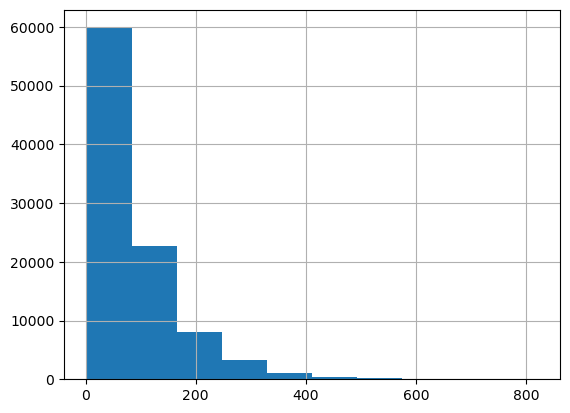

In [3]:
## Binning can be exampled in a histogram. The histogram bins data into the columns within given ranges of the column used from the df.
## So, in this example the first column in the hist as binned records from the PM2.5 column with a range of what looks like 0 to around 80.
## The next column goes up from there with less records and so on.
air_quality['PM2.5'].hist()

## Cut function

In [4]:
# The cut function can bin the data and return a series that the data from that column belongs to.
# If we look back above at the air_quality['PM2.5'].head() we see that there was a 9,4,4 5,3 for the first 5 variables. Those 5 variables all fall in the 1.181, 83.9 section.
# You can view the order of the bins below in the 'categories section
pd.cut(air_quality['PM2.5'], bins = 10)

0        (1.181, 83.9]
1        (1.181, 83.9]
2        (1.181, 83.9]
3        (1.181, 83.9]
4        (1.181, 83.9]
             ...      
95680    (1.181, 83.9]
95681    (1.181, 83.9]
95682    (1.181, 83.9]
95683    (1.181, 83.9]
95684    (1.181, 83.9]
Name: PM2.5, Length: 95685, dtype: category
Categories (10, interval[float64, right]): [(1.181, 83.9] < (83.9, 165.8] < (165.8, 247.7] < (247.7, 329.6] ... (493.4, 575.3] < (575.3, 657.2] < (657.2, 739.1] < (739.1, 821.0]]

In [5]:
pd.cut(air_quality['PM2.5'], bins = 10).value_counts()

PM2.5
(1.181, 83.9]     59923
(83.9, 165.8]     22741
(165.8, 247.7]     8132
(247.7, 329.6]     3225
(329.6, 411.5]     1011
(411.5, 493.4]      384
(493.4, 575.3]      171
(575.3, 657.2]       70
(657.2, 739.1]       22
(739.1, 821.0]        6
Name: count, dtype: int64

In [6]:
# You can view the widths by subtracting 
83.9 - 1.181

82.71900000000001

In [7]:
165.8 - 83.9

81.9

#### So we can see that the cut method seperated the data into 10 bins, similar to the hist()
#### each of which has a width of around 82

In [8]:
# Returns intervals defined by the list of bins
pd.cut(air_quality['PM2.5'], bins = [0,12,35.4,55.4,150.4,250.4,999])

0         (0.0, 12.0]
1         (0.0, 12.0]
2         (0.0, 12.0]
3         (0.0, 12.0]
4         (0.0, 12.0]
             ...     
95680     (0.0, 12.0]
95681     (0.0, 12.0]
95682    (12.0, 35.4]
95683    (12.0, 35.4]
95684    (12.0, 35.4]
Name: PM2.5, Length: 95685, dtype: category
Categories (6, interval[float64, right]): [(0.0, 12.0] < (12.0, 35.4] < (35.4, 55.4] < (55.4, 150.4] < (150.4, 250.4] < (250.4, 999.0]]

In [9]:
pd.cut(air_quality['PM2.5'], bins = [0,12,35.4,55.4,150.4,250.4,999]).value_counts()

PM2.5
(55.4, 150.4]     34257
(12.0, 35.4]      19853
(0.0, 12.0]       13576
(35.4, 55.4]      12457
(150.4, 250.4]    10821
(250.4, 999.0]     4721
Name: count, dtype: int64

In [12]:
# The intervals used are not random, 0-12 is considered 'good' air quality, 12-35.4 is "moderate" and so on.
# Lets add those lables to the interval
pd.cut(air_quality['PM2.5'], bins = [0,12,35.4,55.4,150.4,250.4,999], 
       labels = ['Good', 'Moderate', 'Unhealthy for sensitive groups', 'Unhealthy', 'Very unhealthy', 'Hazardous'])

0            Good
1            Good
2            Good
3            Good
4            Good
           ...   
95680        Good
95681        Good
95682    Moderate
95683    Moderate
95684    Moderate
Name: PM2.5, Length: 95685, dtype: category
Categories (6, object): ['Good' < 'Moderate' < 'Unhealthy for sensitive groups' < 'Unhealthy' < 'Very unhealthy' < 'Hazardous']

In [13]:
pd.cut(air_quality['PM2.5'], bins = [0,12,35.4,55.4,150.4,250.4,999], 
       labels = ['Good', 'Moderate', 'Unhealthy for sensitive groups', 'Unhealthy', 'Very unhealthy', 'Hazardous']).value_counts()

PM2.5
Unhealthy                         34257
Moderate                          19853
Good                              13576
Unhealthy for sensitive groups    12457
Very unhealthy                    10821
Hazardous                          4721
Name: count, dtype: int64

In [14]:
# Lets make a new column in the data set called PM2.5 Category
air_quality['PM2.5_category'] = pd.cut(air_quality['PM2.5'], bins = [0,12,35.4,55.4,150.4,250.4,999], 
       labels = ['Good', 'Moderate', 'Unhealthy for sensitive groups', 'Unhealthy', 'Very unhealthy', 'Hazardous'])

In [15]:
air_quality[['PM2.5','PM2.5_category']]

,PM2.5,PM2.5_category
0,9.0,Good
1,4.0,Good
2,4.0,Good
3,5.0,Good
4,3.0,Good
...,...,...
95680,9.0,Good
95681,10.0,Good
95682,18.0,Moderate
95683,15.0,Moderate


In [17]:
air_quality['PM2.5_category'].value_counts(normalize = True)

PM2.5_category
Unhealthy                         0.358018
Moderate                          0.207483
Good                              0.141882
Unhealthy for sensitive groups    0.130188
Very unhealthy                    0.113090
Hazardous                         0.049339
Name: proportion, dtype: float64

### Obserrve the difference in binning 10 vs predetermined bins

In [18]:
## Uses seperate bins with large amounts of records all the way down to small records
# This isn't the most ideal with the large fluctuation and cound lead to false outliers
pd.cut(air_quality['PM2.5'], bins = 10).value_counts()

PM2.5
(1.181, 83.9]     59923
(83.9, 165.8]     22741
(165.8, 247.7]     8132
(247.7, 329.6]     3225
(329.6, 411.5]     1011
(411.5, 493.4]      384
(493.4, 575.3]      171
(575.3, 657.2]       70
(657.2, 739.1]       22
(739.1, 821.0]        6
Name: count, dtype: int64

In [22]:
## Much nicer grouping due to the bins and can observe very poor air qualities using the newly defined lables
air_quality['PM2.5_category'].value_counts()

PM2.5_category
Unhealthy                         34257
Moderate                          19853
Good                              13576
Unhealthy for sensitive groups    12457
Very unhealthy                    10821
Hazardous                          4721
Name: count, dtype: int64

## qcut function
#### What if we wanted to bin equal amounts of records into each bin?

In [23]:
# Bins into 4 equal intervals 
pd.qcut(air_quality['PM2.5'], q = 4)

0        (1.999, 23.0]
1        (1.999, 23.0]
2        (1.999, 23.0]
3        (1.999, 23.0]
4        (1.999, 23.0]
             ...      
95680    (1.999, 23.0]
95681    (1.999, 23.0]
95682    (1.999, 23.0]
95683    (1.999, 23.0]
95684    (1.999, 23.0]
Name: PM2.5, Length: 95685, dtype: category
Categories (4, interval[float64, right]): [(1.999, 23.0] < (23.0, 59.0] < (59.0, 116.0] < (116.0, 821.0]]

In [24]:
pd.qcut(air_quality['PM2.5'], q = 4).value_counts()

PM2.5
(1.999, 23.0]     24708
(59.0, 116.0]     23908
(116.0, 821.0]    23645
(23.0, 59.0]      23424
Name: count, dtype: int64

In [26]:
# Very very closly binned intervals 
pd.qcut(air_quality['PM2.5'], q = 4).value_counts(normalize = True)

PM2.5
(1.999, 23.0]     0.258222
(59.0, 116.0]     0.249862
(116.0, 821.0]    0.247113
(23.0, 59.0]      0.244803
Name: proportion, dtype: float64

In [27]:
# Return the order in the original interval order
pd.qcut(air_quality['PM2.5'], q = 4).value_counts(normalize = True, sort = False)

PM2.5
(1.999, 23.0]     0.258222
(23.0, 59.0]      0.244803
(59.0, 116.0]     0.249862
(116.0, 821.0]    0.247113
Name: proportion, dtype: float64

In [29]:
## Notice how the bins are seperated into 4 equal parts, these are the quartiles!
# Check using the describe
# Notice the min = 2 is close to 1.99 in the first interval
# the 25% is 23 is exactly equal to 23 in the interval and so on.
air_quality['PM2.5'].describe()

count    95685.000000
mean        83.477884
std         82.678134
min          2.000000
25%         23.000000
50%         59.000000
75%        116.000000
max        821.000000
Name: PM2.5, dtype: float64

In [30]:
# Lets apply the qcut to different column TEMP wit 5 intervals
pd.qcut(air_quality['TEMP'], q = 5)

0        (-16.801000000000002, 1.8]
1        (-16.801000000000002, 1.8]
2        (-16.801000000000002, 1.8]
3        (-16.801000000000002, 1.8]
4        (-16.801000000000002, 1.8]
                    ...            
95680                  (10.1, 18.7]
95681                  (10.1, 18.7]
95682                  (10.1, 18.7]
95683                  (10.1, 18.7]
95684                   (1.8, 10.1]
Name: TEMP, Length: 95685, dtype: category
Categories (5, interval[float64, right]): [(-16.801000000000002, 1.8] < (1.8, 10.1] < (10.1, 18.7] < (18.7, 24.8] < (24.8, 41.6]]

In [31]:
# Add labels
pd.qcut(air_quality['TEMP'], q = 5, labels = ['Very Cold', ' Cold', 'Warm', 'Hot', 'Very Hot'])

0        Very Cold
1        Very Cold
2        Very Cold
3        Very Cold
4        Very Cold
           ...    
95680         Warm
95681         Warm
95682         Warm
95683         Warm
95684         Cold
Name: TEMP, Length: 95685, dtype: category
Categories (5, object): ['Very Cold' < ' Cold' < 'Warm' < 'Hot' < 'Very Hot']

In [32]:
pd.qcut(air_quality['TEMP'], q = 5, labels = ['Very Cold', ' Cold', 'Warm', 'Hot', 'Very Hot']).value_counts()

TEMP
Hot          19189
Very Cold    19156
 Cold        19154
Warm         19143
Very Hot     19043
Name: count, dtype: int64

In [33]:
air_quality['TEMP_category'] = pd.qcut(air_quality['TEMP'], q = 5, labels = ['Very Cold', ' Cold', 'Warm', 'Hot', 'Very Hot'])

In [35]:
air_quality[['TEMP', 'TEMP_category']]

,TEMP,TEMP_category
0,-0.5,Very Cold
1,-0.7,Very Cold
2,-2.4,Very Cold
3,-2.5,Very Cold
4,-1.4,Very Cold
...,...,...
95680,15.4,Warm
95681,14.9,Warm
95682,10.8,Warm
95683,10.5,Warm


## Now pickle the data to use later

In [36]:
air_quality.to_pickle('air_quality.pkl')